In [3]:
from gs_quant.session import GsSession
# external users should substitute their client id and secret; please skip this step if using internal jupyterhub
GsSession.use(client_id=None, client_secret=None, scopes=('run_analytics',)) 

### IR Implied Volatility Screen (Fixed Strike)

In this screen, we compare the implied volatility of swaptions at a fixed strike across a range of expiries and tenors in a grid.

In [4]:
from gs_quant.instrument import IRSwaption
from gs_quant.common import PayReceive
from gs_quant.markets.portfolio import Portfolio
from gs_quant.risk import IRAnnualImpliedVol
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format

def implied_vol_grid(expiries, termination, pay_rec, ccy, moneyness):
    portfolios = Portfolio([Portfolio([IRSwaption(pay_or_receive=pay_rec, notional_currency=ccy, termination_date=t, 
                                                  expiration_date=e, strike=f'ATMF+{moneyness}') for e in expiries]) for t in termination])
    portfolios.resolve()
    results = portfolios.calc(IRAnnualImpliedVol)

    frame = results.to_frame('value','portfolio_name_0','instrument_name') * 10000
    frame.columns=expiries
    frame.index=termination
    plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(frame, annot=True, fmt='.2f', cmap='coolwarm')
    ax.set(ylabel='Expiries', xlabel='Tenor', title='Implied Vol Grid (bps) w. '+ str(moneyness)+'bps moneyness')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 

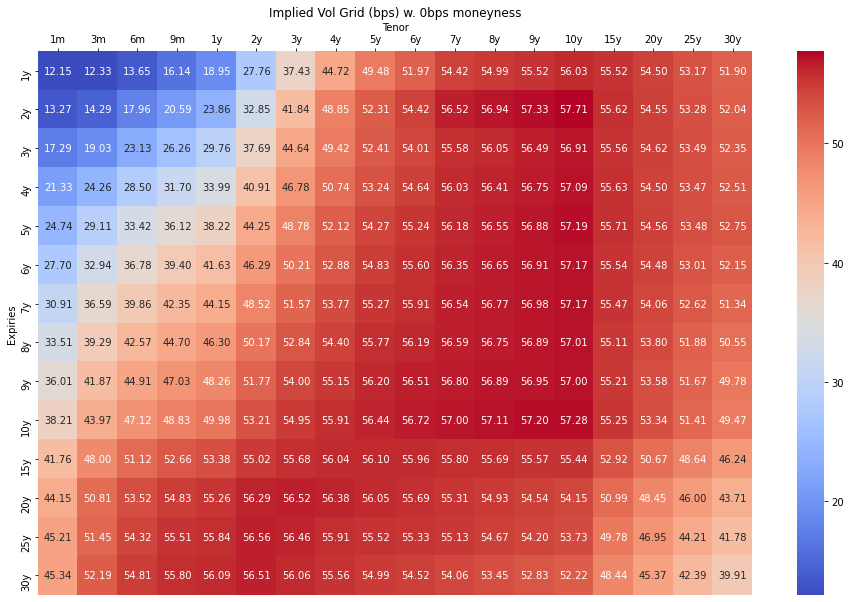

In [5]:
expiries = ['1m', '3m' ,'6m', '9m', '1y', '2y', '3y', '4y', '5y',  '6y', '7y', '8y', '9y', '10y', '15y', '20y', '25y', '30y']
termination = ['1y', '2y', '3y', '4y', '5y',  '6y', '7y', '8y', '9y', '10y', '15y', '20y', '25y', '30y']
pay_rec = PayReceive.Pay
ccy = 'EUR'
moneyness = 0

implied_vol_grid(expiries, termination, pay_rec, ccy, moneyness)